<a href="https://colab.research.google.com/github/wordsbyanmol/Machine-Learning-Course/blob/main/Anmol_mlpp24_assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MLPP24 // Assignment #5**

assigned : **Apr 2, 2024**

DUE : **Apr 9, 2024 11:59pm**

## Diabetes Risk: Predicting Outcomes in Homogeneous Populations

<img src="https://images.squarespace-cdn.com/content/v1/5a21a88bcd39c3ec782756ed/1519148471554-P8KM1H55H4ZXM3QWC2EJ/Diabetes12.jpg?format=2500w" width=500>

---

This notebook will use Logistic Regression to attempt to predict diabetes from recorded health data in the Pima population in AZ.  The data is available [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database/activity) and a description of a long term diabetes study involving this population can be found [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4418458/).  *Answering the questions below will require that you read through the content of these links in detail.*

<b>

How to complete and submit assignments:

1. Please make a copy of this notebook in your Google Drive and add your name to the filename.

2. Once you have completed the notebook, please share it with me before the due date and time by clicking the "Share" button in the upper right corner of the notebook.


Rules for assignments:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed below.  Direct copying from someone else's notebook is not permitted.

2. You may use generative AI models (e.g., ChatGPT) to help complete the assignment but if you do you must answer YES to the question below and bear in mind that such models <u>often</u> yield incorrect and biased solutions.

3. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

4. Late assignments will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term.

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

Maria and Nesar

**Did you use a generative AI model (e.g., ChatGPT) to create text or code for this assignment?**

Yes

---

### **Part 1: Loading and Parsing the Data**

**Load the study data from the `mlpp24/data/diabetes/` folder.**

In [ ]:
# -- useful imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz
import plotly.express as px

In [ ]:
fname= "/content/drive/Shareddrives/mlpp24/data/diabetes/diabetes.csv"

In [ ]:
#name dataframe
diabetes=pd.read_csv(fname)
diabetes1= diabetes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#define plotly templates
px.defaults.width= 900
px.defaults.template= "ggplot2"

**Display the contents of this data and describe <u>in your own words</u> what the content of each column is, including units where appropriate.**

In [ ]:
diabetes.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


This file contains a health dataset of a female population with 768 rows and 9 columns.  From the source, we know that all patients here are females at least 21 years old of the Pima Indian heritage. The health indicators or independent variables include: Pregnancies,	Glucose,	BloodPressure,	SkinThickness,	Insulin,	BMI,	DiabetesPedigreeFunction, and	Age. The dependent variable or target is	Outcome which represents diabetes. All variables are int64 except BMI and DiabetesPedigreeFunction (Float64) which have decimal points. The description of each column is given below:

Glucose is a simple sugar, also known as a monosaccharide, and it is one of the primary sources of energy for living organisms. Glucose levels are typically measured in the blood, and the unit of measurement is milligrams per deciliter (mg/dL) in the United States or millimoles per liter (mmol/L) in many other countries.

Blood pressure is the force exerted by the blood against the walls of the arteries as the heart pumps it around the body. It's typically expressed as two numbers, measured in millimeters of mercury (mmHg):

Skin thickness refers to the depth or thickness of the skin, which varies depending on the location on the body and individual factors such as age, sex, and genetics. Skin thickness is typically measured in millimeters (mm) or micrometers (µm). Insulin is a hormone produced by the pancreas that plays a crucial role in regulating blood sugar levels in the body.

Insulin levels are typically measured in international units per milliliter (IU/mL) or in picomoles per liter (pmol/L). BMI stands for Body Mass Index. It is a measure commonly used to assess an individual's body weight relative to their height and is used as a screening tool to categorize individuals into different weight categories, such as underweight, normal weight, overweight, or obese.


The Diabetes Pedigree Function (DPF) is a measure used in diabetes research and clinical practice to assess the likelihood or risk of diabetes based on family history. The exact formula for calculating DPF may vary depending on the study or context, but it generally involves assigning numerical values to the diabetes status of relatives and then summing these values to obtain an overall score. A higher DPF score indicates a greater likelihood of diabetes.

**Make a 3x3 panel plot with the histograms of each of the nine columns.**

```
`# This is formatted as code`
```



In [ ]:
diabetes.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


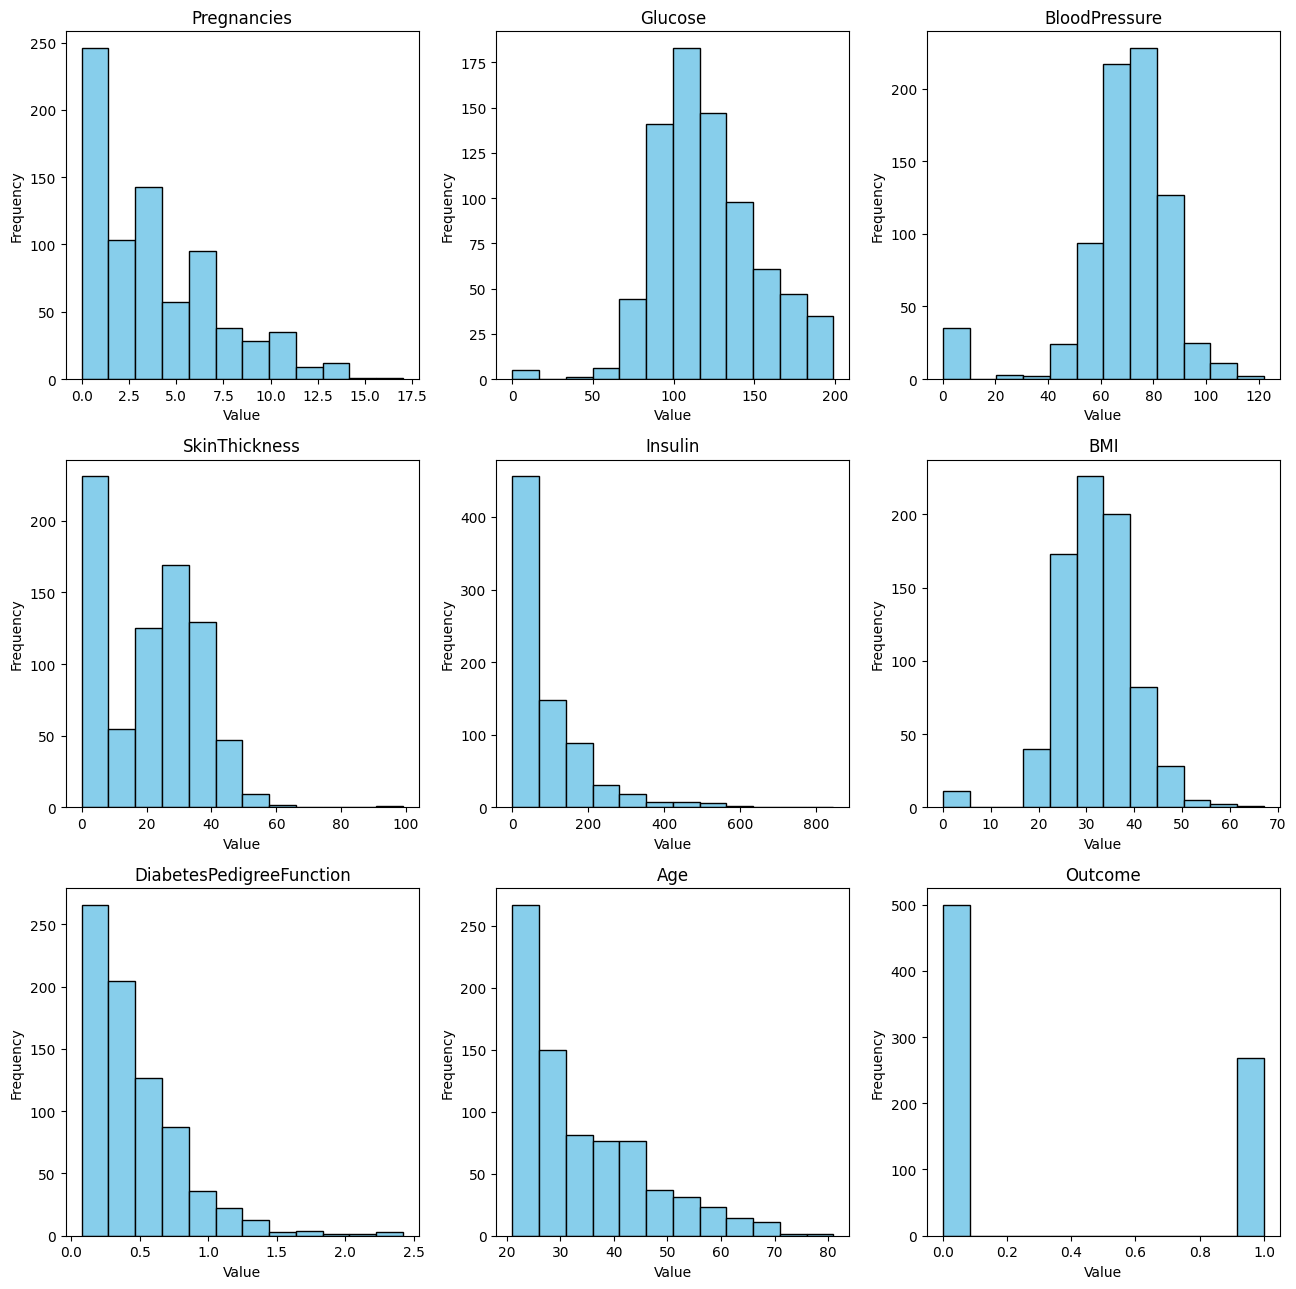

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(13, 13))

axes = axes.flatten()

for i, col in enumerate(diabetes.columns):
    diabetes[col].plot(kind='hist', ax=axes[i], bins=12, edgecolor='black', color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

**Describe what information you can infer from each histogram in this plot.**

Histogram 1: The majority of women have had 0 to 4 pregnancies.The distribution is skewed left.
Histogram 2: The majority  of people have glucose level ranging between 80-125. The distribution is skewed right.
Histogram 3: The majority of people have blood pressure levels between 50-90. The distribution is close to a normal distribution.
Histogram 4: The largest skintchikeness is between 0-10 for 200+ respondents. The majority of people have skin thicknesses between 20-40. The distribution is skewed left.
Histogram 5: The majority of people have insulin level between 0-150.Most people fall in category of 0-100 insulin levels. The distribution is skewed left.
Histogram 6: The majority of people have BMI level between 20-40.The distribution looks normal.
Histogram 7: The majority of people have DiabetesPedigreeFunction between 0.2-1. The distribution is skewed left.
Histogram 8: The majority of respondents ()250+ fall in age group between 20-40. The distribution is skewed right. The largest group of respondents are between 20-30.
Histogram 9: Almost 500 out of 768 people test negative for diabetes.




**Remove rows for which the values of any of the columns are not physically possible (e.g., it is not possible to have a BMI of $0$).**

In [ ]:
# Filter out rows where any column has physically impossible values
diabetes_filtered = diabetes[(diabetes['BMI'] > 0) & (diabetes['Glucose'] > 0) & (diabetes['BloodPressure'] > 0) & (diabetes['SkinThickness']>0) &(diabetes['Insulin']>0)]

# Display the filtered DataFrame
print(diabetes_filtered)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
13             1      189             60             23      846  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0      181             88             44      510  43.3   
755            1      128             88             39      110  36.5   
760            2       88             58             26       16  28.4   
763           10      101             76             48      180  32.9   
765            5      121             72             23      112  26.2   

     DiabetesPedigreeFunction  Age  Outcome  
3                       0.167   21        0  
4                  

**Re-plot the 3x3 panel plot of histograms with this new subset of the data.**

In [ ]:
diabetes_filtered.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


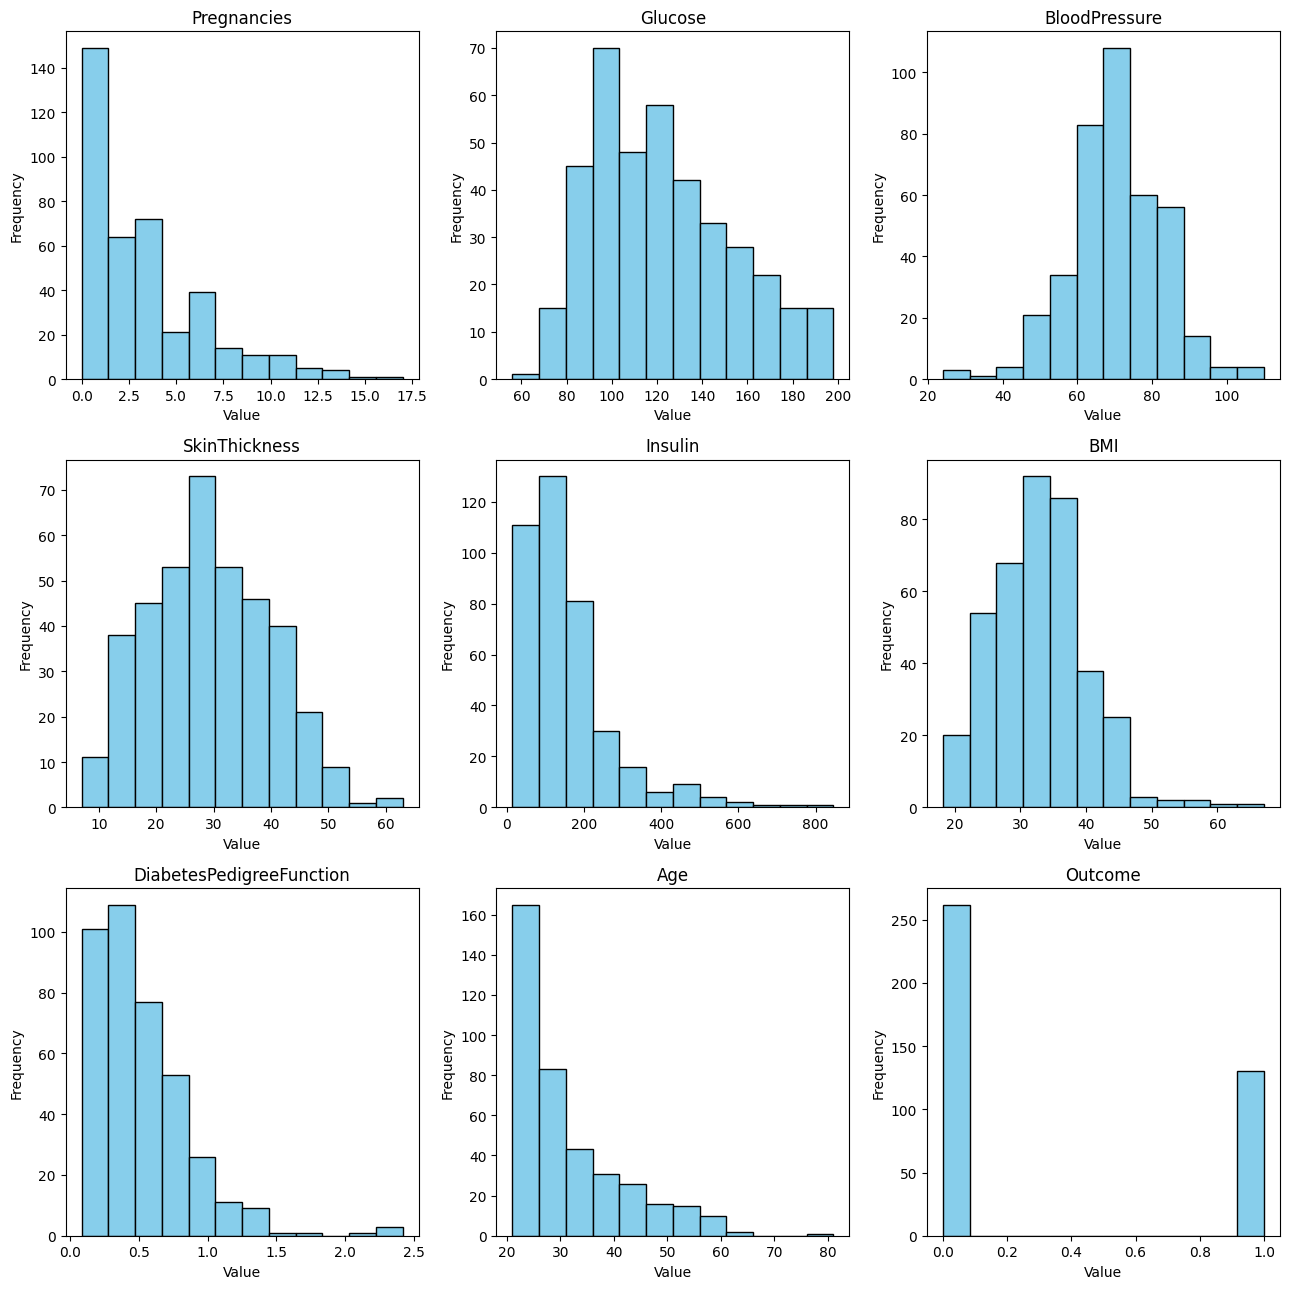

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(13, 13))

axes = axes.flatten()

for i, col in enumerate(diabetes.columns):
    diabetes_filtered[col].plot(kind='hist', ax=axes[i], bins=12, edgecolor='black', color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

## **Part 2: Fitting a Logistic Regression Model**

First, let's run a logistic regression model on a single feature.

In [ ]:
#import sckit-learn's Stochastic Gradient Descent classifier
from sklearn.linear_model import LogisticRegression

In [ ]:
#initaite SGD logistics regression model
lm= LogisticRegression()

In [ ]:
lm

LogisticRegression()

**Create features and targets objects from the subset of the data that you created above where the features are only blood pressure and the target is the outcome.**

In [ ]:
#create feature
diabetes_filtered[["BloodPressure"]]

,BloodPressure
3,66
4,40
6,50
8,70
13,60
...,...
753,88
755,88
760,58
763,76


:**Instantiate and fit a logistic regression model to this feature and target using `sklearn`'s `LogisticRegression`.**

In [ ]:
#fit the model with the data
lm.fit(diabetes_filtered[["BloodPressure"]],diabetes_filtered["Outcome"])

LogisticRegression()

In [ ]:
#predict the data
model= lm.predict(diabetes_filtered[["BloodPressure"]])
model

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<b>

Use `plotly` to make a scatter plot of blood pressure vs outcome that contains

- the raw data using black points with an alpha (transparency) value of $0.2$;
- the logistic regression model predictions using blue points that are slightly smaller than the raw data points; and
- the best fit probabilty curve (i.e., the logistic function) from the logistic regression model.

</b>

In [ ]:
#create logistic function
logistic_function = (1/(1+np.exp(-lm.coef_[0][0]*diabetes[["BloodPressure"]]-lm.intercept_[0])))


In [ ]:
# Add the predicted probabilities to the DataFrame
diabetes_filtered["logistic_function"] = logistic_function


<ipython-input-153-027c6ca1be4a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
diabetes_filtered. head ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,logistic_function
3,1,89,66,23,94,28.1,0.167,21,0,0.290796
4,0,137,40,35,168,43.1,2.288,33,1,0.143289
6,3,78,50,32,88,31.0,0.248,26,1,0.191028
8,2,197,70,45,543,30.5,0.158,53,1,0.320045
13,1,189,60,23,846,30.1,0.398,59,1,0.250030


<ipython-input-155-b7df3aa93214>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



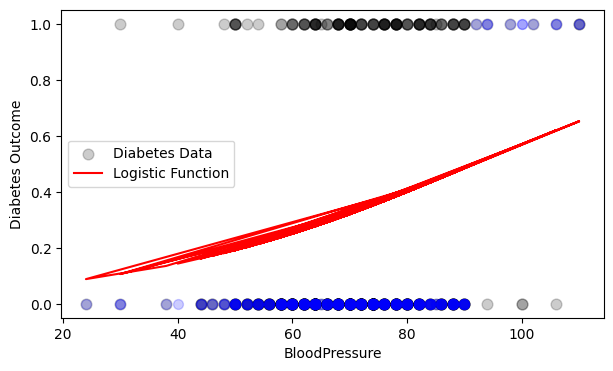

In [ ]:
#add prediction back to the dataframe
diabetes_filtered["model"]= model

#plot the data
ax= diabetes_filtered.plot("BloodPressure", "Outcome", kind= "scatter", xlabel= "Blood Pressure Count",
                ylabel="Diabetes Outcome",
                color= "black", alpha=0.2,label= "Diabetes Data", s=60,figsize= (7,4))

# Plot the logistic function predictions
ax.scatter(diabetes_filtered["BloodPressure"], diabetes_filtered["model"], color="blue", alpha=0.2, label="Logistic Function Predictions", s=50)


#add the model line
ax = diabetes_filtered.plot(x="BloodPressure", y="logistic_function", label="Logistic Function", color="red", ax=ax)


In [ ]:
import plotly.graph_objects as go

# Create the scatter plot using Plotly
fig = go.Figure()

# Add raw data points
fig.add_trace(go.Scatter(x=diabetes_filtered["BloodPressure"], y=diabetes_filtered["Outcome"],
                         mode="markers", marker=dict(color="black", opacity=0.2),
                         name="Diabetes Data"))

# Add logistic function predictions
fig.add_trace(go.Scatter(x=diabetes_filtered["BloodPressure"], y=diabetes_filtered["model"],
                         mode="markers", marker=dict(color="blue", opacity=0.2),
                         name="Logistic Regression Model"))

# Add logistic function line
fig.add_trace(go.Scatter(x=diabetes_filtered["BloodPressure"], y=diabetes_filtered["logistic_function"],
                         mode="lines", line=dict(color="red"),
                         name="Logistic Probability Line"))

# Update layout
fig.update_layout(title="Scatter Plot of Blood Pressure vs. Diabetes Outcome Prediction",
                  xaxis_title="Blood Pressure Count",
                  yaxis_title="Diabetes Outcome")

# Show the plot
fig.show()

**Discuss what you can infer from this plot.**

The plot shows that BloodPressure and Diabetes Outcome have an inverse relationship. When the blood pressure count is on the lower side the diabetes outcome is negative. Meanwhile, when the BloodPressure count is high the diabetes outcome is positive. Given the majority of values are in the middle, we can surmise the relationship is not very strong. As the blood pressure increases the possibility of a positive diabetes outcome also rises. More specifically, the plotline show that as the blood pressure crosses the 80-90 mark, the likelihood of diabetes becomes higher by more than 50 per cent.

** **bold text**Calculate the accuracy of this model by counting the number of target values that were correctly predicted and dividing by the total number of target values.**

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(diabetes_filtered['Outcome'], model)

print("Accuracy:", accuracy)

Accuracy: 0.6760204081632653


Lower values of MSE indicate better fit of the model to the data, as it means that the model's predictions are closer to the actual values.

Now let's fit a model that uses all features.

**Instantiate and fit a logistic regression model that uses all available features to predict the outcome.**

> Add blockquote



In [ ]:
from sklearn.linear_model import LogisticRegression

#Separate features and target variable
X = diabetes_filtered[['BloodPressure', 'Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'SkinThickness']]
y = diabetes_filtered['Outcome']

# Step 2: Instantiate the logistic regression model
logistic_model = LogisticRegression()

# Step 3: Fit the model to the data
logistic_model.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
#predict the data
model1= logistic_model.predict(diabetes_filtered[['BloodPressure', 'Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'SkinThickness']])
model1

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
diabetes_filtered. head ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,logistic_function,model
3,1,89,66,23,94,28.1,0.167,21,0,0.290796,0
4,0,137,40,35,168,43.1,2.288,33,1,0.143289,0
6,3,78,50,32,88,31.0,0.248,26,1,0.191028,0
8,2,197,70,45,543,30.5,0.158,53,1,0.320045,0
13,1,189,60,23,846,30.1,0.398,59,1,0.250030,0


**Calculate the accuracy for this model.**

In [ ]:
# Calculate accuracy score for the model
accuracy_score = logistic_model.score(X, y)

print("Accuracy Score:", accuracy_score)

Accuracy Score: 0.7882653061224489


**If someone were to ask you if either of the two models that you just fit are "good" models, what would you say? (250 words max)**

I would say that the accuracy of the second model to predict diabetes outcome is higher at 78.82 per cent versus 67.60 for the first model. Both models have some predictive value for diabetes outcome in females. The first model only examined Blood Pressure. It missed out on other important variables. However, the second model examines multiple factors. These variables have a causal relationship to diabetes outcome and that increases its robustness.  

## **Part 3: Fitting a Decision Tree Model**

**Fit a decision tree classifier that uses all available features to predict the outcome.**

In [ ]:
#instantiate the model
dtc= DecisionTreeClassifier ()
dtc.fit (feat, targ)

DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
#check for unique values in the Target
diabetes_filtered["Outcome"]. unique()

array([0, 1])

In [ ]:
# Split the data into training and test sets
feat_train, feat_test, targ_train, targ_test = train_test_split(feat, targ, test_size=0.2, random_state=42)

In [ ]:
feat_train

,BloodPressure,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,SkinThickness
506,90,0,180,90,36.5,0.314,35,26
368,86,3,81,66,27.5,0.306,22,16
345,88,8,126,108,38.5,0.349,49,36
134,68,2,96,49,21.1,0.647,26,13
659,82,3,80,70,34.2,1.292,27,31
...,...,...,...,...,...,...,...,...
150,74,1,136,204,37.4,0.399,24,50
220,60,0,177,478,34.6,1.072,21,29
528,66,0,117,188,30.8,0.493,22,31
673,100,3,123,240,57.3,0.880,22,35


In [ ]:
#fit a decision tree on the training data
dtc = DecisionTreeClassifier()
dtc.fit(feat_train, targ_train)

DecisionTreeClassifier()

In [ ]:
#assess accuracy on the training data
pred_train = dtc.predict(feat_train)
accuracy_train= accuracy_score(targ_train, pred_train)
print("training accuracy)={0:.3f}".format(accuracy_train))

training accuracy)=1.000


In [ ]:
#assess accuracy on the training data
pred_test = dtc.predict(feat_test)
accuracy_test= accuracy_score(targ_test, pred_test)
print("testing accuracy)={0:.3f}".format(accuracy_test))

testing accuracy)=0.709


In [ ]:
#create features
feat= diabetes_filtered[['BloodPressure', 'Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'SkinThickness']]


In [ ]:
#pull out target
targ= diabetes_filtered["Outcome"]


In [ ]:
#calculate the accuracy
pred= dtc.predict(feat)
acc= (pred == targ). sum()/len(targ)
acc

0.9413265306122449

In [ ]:
pred

In [ ]:
(pred == targ). sum()

369

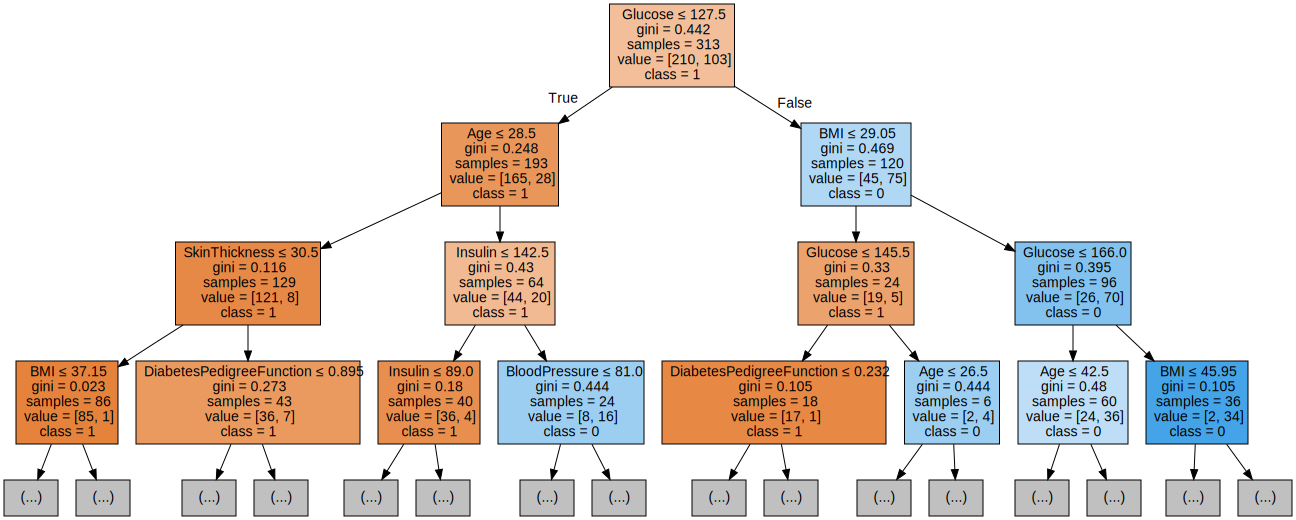

In [ ]:
#visualise the tree
# Assuming 'dtc' is your DecisionTreeClassifier and 'feat' is your feature DataFrame
dtr_data = tree.export_graphviz(dtc, out_file=None, filled=True, rounded=False,
                                special_characters=True, max_depth=3,
                                feature_names=feat.columns, class_names=["1", "0"])
graph = graphviz.Source(dtr_data)
graph

**What feature is used to create the first split (i.e., the root node)?**

In [ ]:
# Get the index of the feature used for the first split
root_feature_index = dtc.tree_.feature[0]

# Get the name of the feature used for the first split
root_feature_name = feat.columns[root_feature_index]

print("Feature used for the first split (root node):", root_feature_name)


Feature used for the first split (root node): Glucose


**How does the accuracy of the decision tree model compare with the logistic regression models?**

The accuracy of the decision tree is much higher at 94.13 per cent than 78 or

*   List item
*   List item

67 percent of either of the logistic regression models.

**Do the two models fail on the same cases (objects) or different cases?**

**How much worse is the accuracy of a decision tree model that uses all of the features *except* the one that was used to create the root node in the model above?**

In [ ]:
dtc.feature_importances_

array([0.08174154, 0.05650955, 0.34250875, 0.13891726, 0.14028378,
       0.07124779, 0.10819417, 0.06059716])

In [ ]:
feat.columns

Index(['BloodPressure', 'Pregnancies', 'Glucose', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'SkinThickness'],
      dtype='object')

The accuracy would be 66 per cent (100-34) as the features importance of Glucose is 34.25 percent.